## SMART INVENTORY MANAGEMENT FOR SMALL BUSINESSES

In [65]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load datasets
sales_data = pd.read_excel('sales data.xlsx')
inventory_data = pd.read_excel('inventory data.xlsx')
customer_behavior = pd.read_excel('customer behaviour.xlsx')
seasonality_data = pd.read_excel('seasonality data.xlsx')

In [3]:
# Merge Sales and Inventory Data
merged_data = pd.merge(sales_data, inventory_data, on='Product ID')

# Merge with Customer Behavior Data
merged_data = pd.merge(merged_data, customer_behavior, on='customer_id')

# Merge with Seasonality Data
final_data = pd.merge(merged_data, seasonality_data, on='Product ID')

# Now `final_data` contains the combined dataset


In [4]:
final_data.head()

,Transaction ID,Date,Product ID,customer_id,gender_x,age_x,Product Bought_x,quantity_x,price/product_x,Unit Cost,...,Availability_y,Number of products sold_y,Revenue generated_y,Stock levels_y,Reorder Levels_y,Order quantities_y,Location_y,Restock Date_y,Restock Quantity_y,Season
0,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,75,5,7502.00,58,21,7,Mombasa,2024-04-28,22,Winter
1,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,24,1,1800.00,137,66,59,Kirinyaga,2024-04-20,46,Winter
2,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,75,5,7502.00,58,21,7,Mombasa,2024-04-28,22,Winter
3,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,24,1,1800.00,137,66,59,Kirinyaga,2024-04-20,46,Winter
4,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,80,3,5401.53,53,55,46,Kwale,2024-05-29,37,Autumn


In [5]:
# Check for missing values
print(sales_data.isnull().sum())
print(inventory_data.isnull().sum())
print(seasonality_data.isnull().sum())
print(customer_behavior.isnull().sum())

Transaction ID    0
Date              0
Product ID        0
customer_id       0
gender            0
age               0
Product Bought    0
quantity          0
price/product     0
Unit Cost         0
Total_Cost        0
Total Revenue     0
Profit            0
dtype: int64
Product ID                 0
ProductS                   0
price per product          0
Availability               0
Number of products sold    0
Revenue generated          0
Stock levels               0
Reorder Levels             0
Order quantities           0
Location                   0
Restock Date               0
Restock Quantity           0
dtype: int64
Product ID                 0
ProductS                   0
price/product              0
Availability               0
Number of products sold    0
Revenue generated          0
Stock levels               0
Reorder Levels             0
Order quantities           0
Location                   0
Restock Date               0
Restock Quantity           0
Season            

In [6]:
final_data.to_excel('mergedSales data.xlsx',index=False)

## Exploratory Data Analysis

In [66]:
#After cleaning data with power query that is removing duplicated columns and renaming columns to more precise titles
#load the data
df = pd.read_excel('final project data.xlsx')
df.head()

,Transaction ID,Date Sold,Product ID,customer_id,Gender,Age,Product Sold,quantity sold,price per product,Unit Cost,...,Reorder Levels,Order quantities,Location,Restock Date,Restock Quantity,invoice_no,payment_method,invoice_date,Purchase Frequency(Monthly),Season
0,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,21,7,Mombasa,2024-04-28,22,I138884,Credit Card,2022-05-08 00:00:00,22,Winter
1,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,21,7,Mombasa,2024-04-28,22,I138884,Credit Card,2022-05-08 00:00:00,22,Winter
2,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,66,59,Kirinyaga,2024-04-20,46,I138884,Credit Card,2022-05-08 00:00:00,22,Winter
3,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,66,59,Kirinyaga,2024-04-20,46,I138884,Credit Card,2022-05-08 00:00:00,22,Winter
4,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,55,46,Kwale,2024-05-29,37,I317333,Debit Card,2021-12-12 00:00:00,10,Autumn


In [67]:
 # Converting 'Date Sold' to datetime format
df['Date Sold'] = pd.to_datetime(df['Date Sold'], format='%Y-%m-%d')

In [68]:
# Extract month and year, then format as full month name
df['Month'] = df['Date Sold'].dt.to_period('M').dt.to_timestamp().dt.strftime('%B')

# Aggregate monthly sales per product
monthly_sales = df.groupby(['Product ID', 'Month'])['quantity sold'].sum().reset_index()

In [69]:
monthly_sales

,Product ID,Month,quantity sold
0,100,November,1
1,101,June,12
2,101,May,4
3,103,February,4
4,106,April,8
...,...,...,...
958,993,February,36
959,993,October,54
960,995,April,1
961,996,June,5


In [70]:
# I am changing seasons to fit the actual months added in the above cell
month_to_season = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall',
    'December': 'Winter'
}
# Mapping months to seasons
df['Season'] = df['Month'].map(month_to_season)

In [71]:
# Checking which products need restocking
df['Restock Needed'] = np.where(df['Stock levels'] <= df['Reorder Levels'], 'Yes', 'No')

In [72]:
df.head()

,Transaction ID,Date Sold,Product ID,customer_id,Gender,Age,Product Sold,quantity sold,price per product,Unit Cost,...,Location,Restock Date,Restock Quantity,invoice_no,payment_method,invoice_date,Purchase Frequency(Monthly),Season,Month,Restock Needed
0,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,Mombasa,2024-04-28,22,I138884,Credit Card,2022-05-08 00:00:00,22,Fall,November,No
1,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,Mombasa,2024-04-28,22,I138884,Credit Card,2022-05-08 00:00:00,22,Fall,November,No
2,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,Kirinyaga,2024-04-20,46,I138884,Credit Card,2022-05-08 00:00:00,22,Fall,November,No
3,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,Kirinyaga,2024-04-20,46,I138884,Credit Card,2022-05-08 00:00:00,22,Fall,November,No
4,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,Kwale,2024-05-29,37,I317333,Debit Card,2021-12-12 00:00:00,10,Winter,February,Yes


In [73]:
#Aggregation functions
total_sales_by_product = df.groupby('Product Sold')['quantity sold'].sum()
print(total_sales_by_product)


Product Sold
Books               996
Clothing           5387
Cosmetics          3082
Electronics         935
Food & Beverage    2540
Shoes              1636
Technology         1028
Toys               1548
Name: quantity sold, dtype: int64


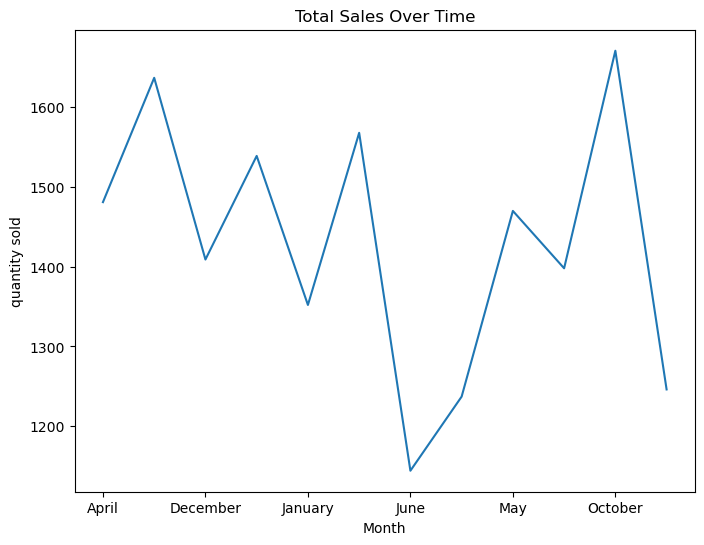

In [28]:
# To Plot sales trends to identify peak periods.
plt.figure(figsize=(8,6))
sales_over_time = df.groupby('Month')['quantity sold'].sum()
sales_over_time.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('quantity sold')
plt.show()


In [29]:
df.columns

Index(['Transaction ID', 'Date Sold', 'Product ID', 'customer_id', 'Gender',
       'Age', 'Product Sold', 'quantity sold', 'price per product',
       'Unit Cost', 'Total_Cost', 'Total Revenue', 'Profit', 'Availability',
       'Stock levels', 'Reorder Levels', 'Order quantities', 'Location',
       'Restock Date', 'Restock Quantity', 'invoice_no', 'payment_method',
       'invoice_date', 'Purchase Frequency(Monthly)', 'Season', 'Month',
       'Restock Needed'],
      dtype='object')

In [74]:
# this is to analyze how quickly inventory is being sold.
inventory_turnover = df.groupby('Product ID')['quantity sold'].sum() / df.groupby('Product ID')['Stock levels'].mean()
inventory_turnover


Product ID
100    0.025641
101    0.222222
103    0.111111
106    0.188679
108    0.021898
         ...   
992    0.227488
993    1.616766
995    0.021739
996    0.100000
997    0.019048
Length: 601, dtype: float64

In [75]:
# this is to flter products where Stock Level is less than Reorder Level.
low_stock = df[df['Stock levels'] < df['Reorder Levels']]
low_stock


,Transaction ID,Date Sold,Product ID,customer_id,Gender,Age,Product Sold,quantity sold,price per product,Unit Cost,...,Location,Restock Date,Restock Quantity,invoice_no,payment_method,invoice_date,Purchase Frequency(Monthly),Season,Month,Restock Needed
4,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,Kwale,2024-05-29,37,I317333,Debit Card,2021-12-12 00:00:00,10,Winter,February,Yes
5,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,Kwale,2024-05-29,37,I317333,Debit Card,2021-12-12 00:00:00,10,Winter,February,Yes
8,3,2023-01-13,553,C266599,Male,20,Clothing,1,300.08,195.0520,...,Kilifi,2024-05-26,23,I127801,Cash,2021-09-11 00:00:00,29,Winter,January,Yes
9,3,2023-01-13,553,C266599,Male,20,Clothing,1,300.08,195.0520,...,Kilifi,2024-05-26,23,I127801,Cash,2021-09-11 00:00:00,29,Winter,January,Yes
12,4,2023-05-21,248,C988172,Female,66,Shoes,5,3000.85,1950.5525,...,Tana River,2024-04-19,39,I173702,Credit Card,16/05/2021,6,Spring,May,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5460,993,2023-02-06,437,C306266,Female,31,Clothing,4,1200.32,780.2080,...,Taita/Taveta,2024-05-01,28,I338093,Credit Card,27/07/2022,19,Winter,February,Yes
5470,995,2023-04-30,365,C179915,Male,40,Clothing,3,900.24,585.1560,...,Nyandarua,2024-03-17,21,I177444,Debit Card,2023-09-01 00:00:00,4,Spring,April,Yes
5471,995,2023-04-30,365,C179915,Male,40,Clothing,3,900.24,585.1560,...,Nyandarua,2024-03-17,21,I177444,Debit Card,2023-09-01 00:00:00,4,Spring,April,Yes
5472,995,2023-04-30,365,C179915,Male,40,Clothing,3,900.24,585.1560,...,Wajir,2024-02-20,28,I177444,Debit Card,2023-09-01 00:00:00,4,Spring,April,Yes


In [76]:
# A summary of sales by season
sales_by_season = df.groupby(['Season', 'Product Sold'])['quantity sold'].sum()
sales_by_season


Season  Product Sold   
Fall    Books               276
        Clothing           1333
        Cosmetics           869
        Electronics         246
        Food & Beverage     768
        Shoes               221
        Technology          291
        Toys                311
Spring  Books               129
        Clothing           1671
        Cosmetics           661
        Electronics         247
        Food & Beverage     564
        Shoes               393
        Technology          149
        Toys                374
Summer  Books               299
        Clothing           1032
        Cosmetics           568
        Electronics         315
        Food & Beverage     682
        Shoes               610
        Technology          357
        Toys                486
Winter  Books               292
        Clothing           1351
        Cosmetics           984
        Electronics         127
        Food & Beverage     526
        Shoes               412
        Technolo

In [77]:
# Customer Behavior Analysis, here we count our customers
customers = df.groupby('Gender')['customer_id'].count()
customers


Gender
Female    3320
Male      2168
Name: customer_id, dtype: int64

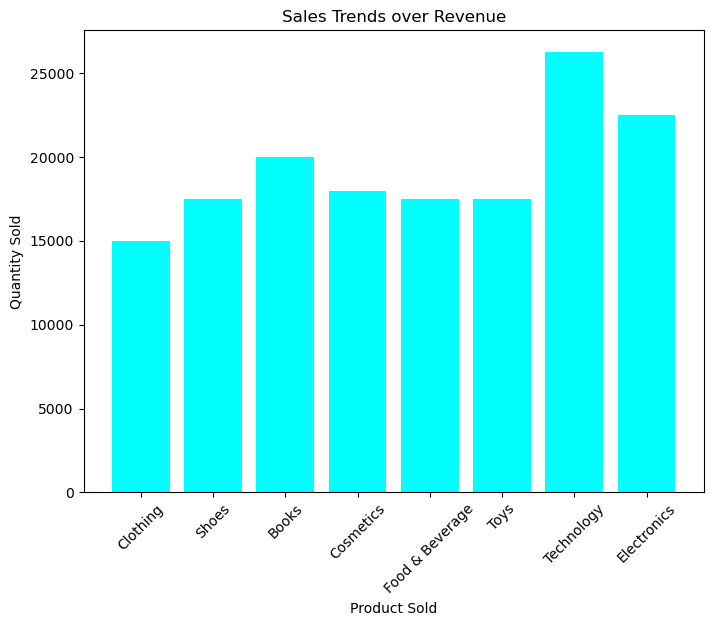

In [78]:
# Plot using matplotlib for df DataFrame
plt.figure(figsize=(8,6))
plt.bar(df['Product Sold'], df['Total Revenue'], color='cyan')
plt.title('Sales Trends over Revenue')
plt.xlabel('Product Sold')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

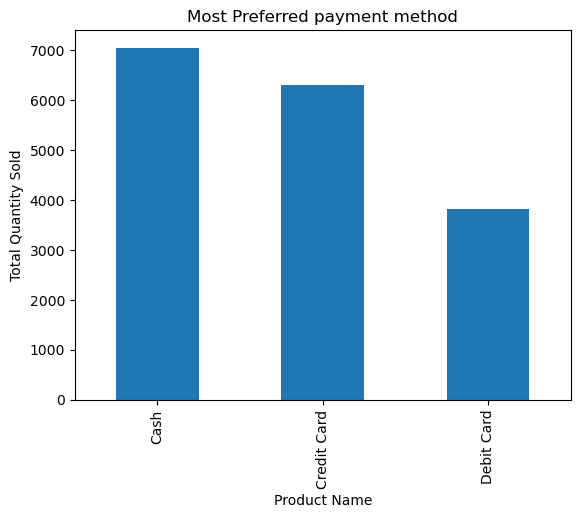

In [79]:
# a bar graph of the most selling product
top_products = df.groupby('payment_method')['quantity sold'].sum().sort_values(ascending=False).head()
top_products.plot(kind='bar')
plt.title('Most Preferred payment method')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

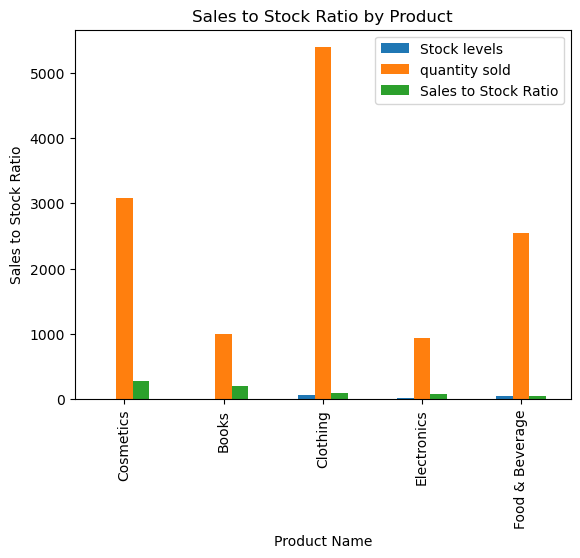

In [33]:
#  Compare current stock levels with sales rates to identify potential stockouts or overstock
stock_sales = df.groupby('Product Sold').agg({'Stock levels': 'first', 'quantity sold': 'sum'})
stock_sales['Sales to Stock Ratio'] = stock_sales['quantity sold'] / stock_sales['Stock levels']
stock_sales.sort_values('Sales to Stock Ratio', ascending=False).head().plot(kind='bar')
plt.title('Sales to Stock Ratio by Product')
plt.xlabel('Product Name')
plt.ylabel('Sales to Stock Ratio')
plt.show()


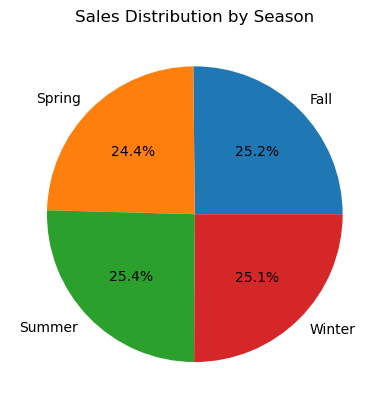

In [15]:
# this shows how different seasons impact sales.
sales_by_season = df.groupby('Season')['quantity sold'].sum()
sales_by_season.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Season')
plt.ylabel('')
plt.show()

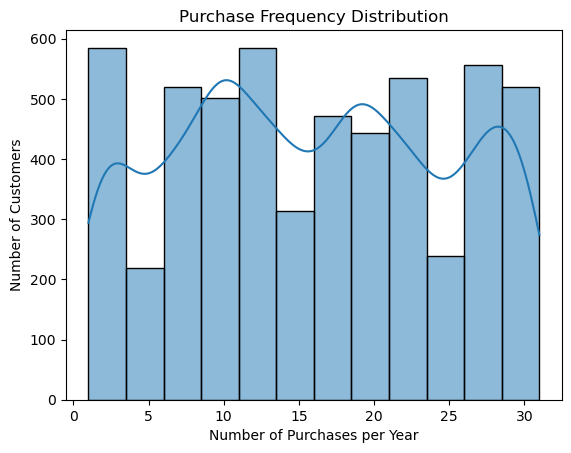

In [19]:
import seaborn as sns
#this is to Understand how often customers make purchases.
sns.histplot(df['Purchase Frequency(Monthly)'], bins=12, kde=True)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Number of Purchases per Year')
plt.ylabel('Number of Customers')
plt.show()


### Predictive Modeling and Forecasting

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns

In [17]:
# changing the date column to the correct format
df['Date Sold'] = pd.to_datetime(df['Date Sold'])

In [82]:
df1 = pd.DataFrame({
    'Product ID': [500] * 24,  # Example Product ID
    'Date Sold': pd.date_range(start='2023-01-01', periods=24, freq='ME'),
    'quantity sold': np.random.randint(5, 50, size=24)  # Random example values
})


In [84]:
# Filter data for a specific product
product_id = 500
product_sales = df[df['Product ID'] == product_id][['Date Sold', 'quantity sold']]
# Preparing Data for Prophet 'ds': For dates'y': For the target value (sales in this case)The columns 'Date Sold' and 'quantity sold' are renamed to 'ds' and 'y' to meet this requirement.
product_sales.rename(columns={'Date Sold': 'ds', 'quantity sold': 'y'}, inplace=True)


11:18:25 - cmdstanpy - INFO - Chain [1] start processing
11:18:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Bettylizzie\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Bettylizzie\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


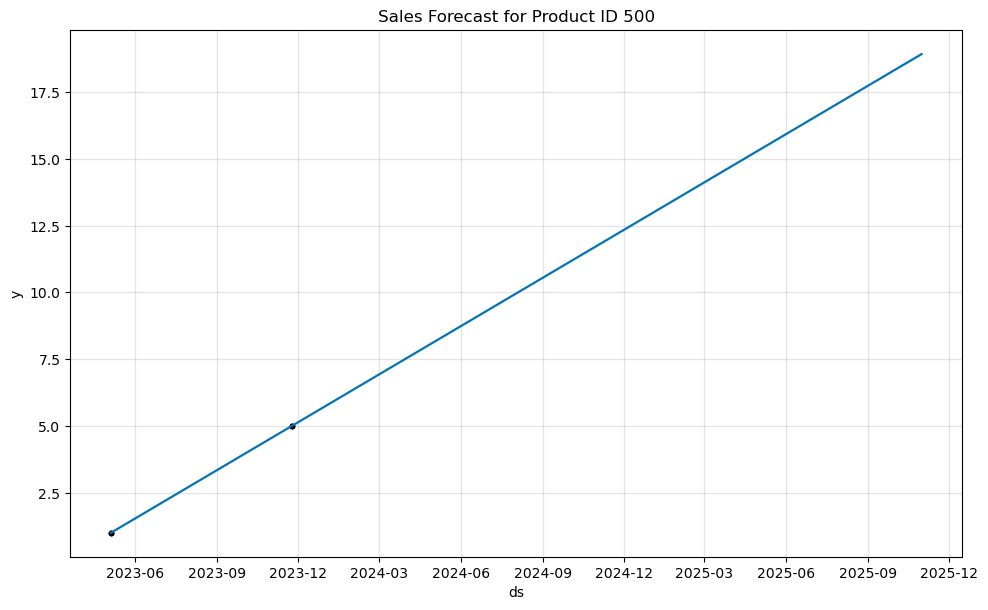

In [85]:
# Check if there is enough data
if len(product_sales) > 2:
    # Initialize and fit the model
    model = Prophet()
    model.fit(product_sales)

    # Create a dataframe for future dates
    future = model.make_future_dataframe(periods=24, freq='ME')
    
    # Predict future values
    forecast = model.predict(future)
    
    # Plot the forecast
    model.plot(forecast)
    plt.title(f'Sales Forecast for Product ID {product_id}')
    plt.show()

In [55]:
product_sales

,ds,y
0,2023-01-31,49
1,2023-02-28,47
2,2023-03-31,22
3,2023-04-30,32
4,2023-05-31,26
5,2023-06-30,19
6,2023-07-31,10
7,2023-08-31,24
8,2023-09-30,31
9,2023-10-31,20


In [56]:
forecast_dates

,ds,yhat
36,2026-01-31,25.073802
37,2026-02-28,24.971622
38,2026-03-31,24.858494
39,2026-04-30,24.749016
40,2026-05-31,24.635888
41,2026-06-30,24.526410
42,2026-07-31,24.413282
43,2026-08-31,24.300154
44,2026-09-30,24.190676
45,2026-10-31,24.077548


In [57]:
#Ensuring that the date columns in both product_sales and forecast_dates are of the same type (datetime).
product_sales['ds'] = pd.to_datetime(product_sales['ds'])
forecast_dates['ds'] = pd.to_datetime(forecast_dates['ds'])

In [58]:
#Ensure that the dates in product_sales cover the period I am forecasting
print(f"Date range in product_sales: {product_sales['ds'].min()} to {product_sales['ds'].max()}")
print(f"Forecast period: {forecast_dates['ds'].min()} to {forecast_dates['ds'].max()}")


Date range in product_sales: 2023-01-31 00:00:00 to 2024-12-31 00:00:00
Forecast period: 2026-01-31 00:00:00 to 2026-12-31 00:00:00


In [59]:
# Extract actual and predicted sales
forecast_dates = forecast[['ds', 'yhat']].tail(12)  # Last 12 months of forecast
actual_sales = product_sales.set_index('ds').reindex(forecast_dates['ds'])['y']
predicted_sales = forecast_dates.set_index('ds')['yhat']

# Drop NaN values
actual_sales = actual_sales.dropna()
predicted_sales = predicted_sales[actual_sales.index]  # Align predicted sales with actual sales index

# Check if there is any data left after dropping NaNs
if len(actual_sales) == 0 or len(predicted_sales) == 0:
    print("No data available after alignment.")
else:
    # Ensure lengths match
    if len(actual_sales) == len(predicted_sales):
        # Calculate error metrics
        mae = mean_absolute_error(actual_sales, predicted_sales)
        rmse = mean_squared_error(actual_sales, predicted_sales, squared=False)
        
        print(f'MAE: {mae}')
        print(f'RMSE: {rmse}')
    else:
        print("Length mismatch between actual and predicted sales.")


No data available after alignment.


## Feature Engineering

In [87]:
df.columns

Index(['Transaction ID', 'Date Sold', 'Product ID', 'customer_id', 'Gender',
       'Age', 'Product Sold', 'quantity sold', 'price per product',
       'Unit Cost', 'Total_Cost', 'Total Revenue', 'Profit', 'Availability',
       'Stock levels', 'Reorder Levels', 'Order quantities', 'Location',
       'Restock Date', 'Restock Quantity', 'invoice_no', 'payment_method',
       'invoice_date', 'Purchase Frequency(Monthly)', 'Season', 'Month',
       'Restock Needed'],
      dtype='object')

In [88]:
#'Date Sold' and 'Restock Date' in datetime format
df['Date Sold'] = pd.to_datetime(df['Date Sold'])
df['Restock Date'] = pd.to_datetime(df['Restock Date'])

In [89]:
# Create lag features and moving averages
df['previous_sales'] = df['quantity sold'].shift(1)
df['sales_moving_avg'] = df['quantity sold'].rolling(window=3).mean()

# Drop any NaN values generated by lagging
df.dropna(inplace=True)

In [90]:
# Calculate additional features
df['Days Since Last Restock'] = (df['Date Sold'] - df['Restock Date']).dt.days
df['Sales Growth Rate'] = df['quantity sold'].pct_change() * 100
df['Lead Time'] = (df['Date Sold'] - df['Restock Date']).dt.days

In [92]:
#  i am Adding a promotion flag column that is 1 for promotion, 0 for no promotion
df['Promotion Flag'] = 0
# for a promotion in June 2023
df.loc[df['Date Sold'].between('2023-06-01', '2023-06-30'), 'Promotion Flag'] = 1

In [93]:
# Creating age groups
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
df['Customer Segment'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [94]:
# Defining a holiday or seasonal flag that is 1 for holiday season, 0 for normal period
df['Holiday Season Flag'] = 0
# Example: Christmas period in December
df.loc[df['Month'] == 'December', 'Holiday Season Flag'] = 1

# Drop any NaN values generated by new features
df.dropna(inplace=True)

In [95]:
# Define feature matrix X and target y with new features
X = df[['previous_sales', 'sales_moving_avg', 'Days Since Last Restock', 
        'Sales Growth Rate', 'Promotion Flag', 'Lead Time', 'Customer Segment', 
        'Holiday Season Flag']]  
y = df['quantity sold']

In [96]:
# Define feature matrix X and target y
X = df[['previous_sales', 'sales_moving_avg']]  
y = df['quantity sold']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [132]:
# i wrote this code coz i was experiencing error during recomendation
# Store Product ID to reattach later after splitting
product_ids = df['Product ID']

# Train/test split (no shuffling to maintain the sequence)
X_train, X_test, y_train, y_test, product_ids_train, product_ids_test = train_test_split(
    X, y, product_ids, test_size=0.2, shuffle=False
)

# Reset the index to ensure clean indexing
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Reattach the Product IDs after resetting index
product_ids_train = product_ids_train.reset_index(drop=True)
product_ids_test = product_ids_test.reset_index(drop=True)


In [133]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [134]:
rf_predictions

array([5.        , 5.        , 5.        , ..., 1.97823626, 2.99725926,
       2.99725926])

In [135]:
# SVM Model
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [136]:
svm_predictions

array([5.10020116, 5.10020116, 5.10020116, ..., 2.08299177, 3.10008232,
       3.10008232])

In [137]:
# KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [138]:
knn_predictions

array([5. , 5. , 5. , ..., 1.6, 3. , 3. ])

Metrics:
Mean Absolute Error (MAE):
Measures the average magnitude of the errors in the predictions, without considering their direction. It’s the average of the absolute differences between predicted and actual values. Lower MAE indicates better model performance.
Root Mean Squared Error (RMSE):
Measures the square root of the average squared differences between predicted and actual values. RMSE gives higher weight to larger errors and is sensitive to outliers. Lower RMSE is better, but it is more influenced by large errors compared to MAE.
R-squared (R²):
Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. R² values range from 0 to 1, where 1 indicates perfect prediction and 0 means no predictive power. Higher R² values indicate that the model explains a larger portion of the variance in the data.

In [139]:
# Error metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Random Forest - MAE: {rf_mae}, RMSE: {rf_rmse}')

Random Forest - MAE: 0.2429507390409101, RMSE: 0.5585773357298941


In [140]:
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
print(f'SVM - MAE: {svm_mae}, RMSE: {svm_rmse}')

SVM - MAE: 0.31870024660019114, RMSE: 0.5732267459852244


In [141]:
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
print(f'KNN - MAE: {knn_mae}, RMSE: {knn_rmse}')

KNN - MAE: 0.27438016528925624, RMSE: 0.568341391733342


Random Forest is a powerful model for handling non-linear relationships and usually performs well with minimal tuning.
SVM is more sensitive to the scaling of the data, so feature scaling might improve its performance.
KNN is a simple method, but it may struggle with large datasets or higher dimensions and thats why in this project we wont use it to also accommodate large businesses

In [ ]:
# here let's use R-squared (R²), which explains how well my model fits the data.(This is similar with checking the accuracy for classification)

In [142]:
from sklearn.metrics import r2_score

In [143]:
# we will start with the Random Forest
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest - R²: {rf_r2}')

Random Forest - R²: 0.8375539785322894


In [144]:
svm_r2 = r2_score(y_test, svm_predictions)
print(f'SVM - R²: {svm_r2}')

SVM - R²: 0.8289215328117855


In [145]:
knn_r2 = r2_score(y_test, knn_predictions)
print(f'KNN - R²: {knn_r2}')

KNN - R²: 0.8318251566871017


In [146]:
df.columns

Index(['Transaction ID', 'Date Sold', 'Product ID', 'customer_id', 'Gender',
       'Age', 'Product Sold', 'quantity sold', 'price per product',
       'Unit Cost', 'Total_Cost', 'Total Revenue', 'Profit', 'Availability',
       'Stock levels', 'Reorder Levels', 'Order quantities', 'Location',
       'Restock Date', 'Restock Quantity', 'invoice_no', 'payment_method',
       'invoice_date', 'Purchase Frequency(Monthly)', 'Season', 'Month',
       'Restock Needed', 'previous_sales', 'sales_moving_avg',
       'Days Since Last Restock', 'Sales Growth Rate', 'Lead Time',
       'Promotion Flag', 'Customer Segment', 'Holiday Season Flag'],
      dtype='object')

In [147]:
df.head()

,Transaction ID,Date Sold,Product ID,customer_id,Gender,Age,Product Sold,quantity sold,price per product,Unit Cost,...,Month,Restock Needed,previous_sales,sales_moving_avg,Days Since Last Restock,Sales Growth Rate,Lead Time,Promotion Flag,Customer Segment,Holiday Season Flag
0,1,2023-11-24,500,C241288,Female,28,Clothing,5,1500.40,975.2600,...,November,No,5.0,5.000000,-148,0.0,-148,0,26-35,0
1,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,February,Yes,5.0,4.333333,-457,-40.0,-457,0,18-25,0
2,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,February,Yes,3.0,3.666667,-457,0.0,-457,0,18-25,0
3,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,February,No,3.0,3.000000,-443,0.0,-443,0,18-25,0
4,2,2023-02-27,915,C111565,Male,21,Shoes,3,1800.51,1170.3315,...,February,No,3.0,3.000000,-443,0.0,-443,0,18-25,0


Results Interpretation
 
Random Forest:

MAE: 0.2429
RMSE: 0.5586
R²: 0.8376
The Random Forest model has the highest R² score among the three models, which means it explains about 83.76% of the variance in the quantity sold. It also has the lowest MAE and RMSE, indicating that it has the smallest average prediction errors and overall prediction error compared to the other models.

SVM:

MAE: 0.3187
RMSE: 0.5732
R²: 0.8289
The SVM model also performs well, with an R² score of 82.89%. It has slightly higher MAE and RMSE compared to Random Forest, which suggests that it might have slightly larger prediction errors.

KNN:

MAE: 0.2744
RMSE: 0.5683
R²: 0.8318
The KNN model has an R² score of 83.18%, which is very close to that of the SVM. It has intermediate MAE and RMSE values, suggesting it has prediction errors between those of Random Forest and SVM.

## Evaluate Models

in this case i will go with Random Forest because it is the best performing model

In [162]:
# Merging predicted sales (rf_predictions_df) with stock levels from the original dataset (df)
# rf_predictions_df stores the predicted sales, and we use the index from X_test to assign 'Product ID'
rf_predictions_df = pd.DataFrame(rf_predictions, columns=['Predicted Sales'])

# Assigning the 'Product ID' to the predicted sales DataFrame using the index from X_test
rf_predictions_df['Product ID'] = X_test.index

# Merging predicted sales with the actual stock levels from the original dataset (df) based on 'Product ID'
# This step helps us compare predicted sales with current stock levels
rf_predictions_df = rf_predictions_df.merge(df[['Product ID', 'Stock levels']], on='Product ID', how='left')

# Function to generate restock recommendations based on actual stock levels and predicted sales
# It ensures that stock does not fall below the reorder point, which can lead to stockouts
# During high sales periods or seasons, a reorder point of 20 might still be too low, requiring adjustment
def generate_restock_recommendations(predictions_df, reorder_point):
    recommendations = []
    
    for index, row in predictions_df.iterrows():
        product_id = row['Product ID']
        predicted_sales = row['Predicted Sales']
        current_stock_level = row['Stock levels']  # Access the current stock level from the dataset
        
        # Checking if restock is needed when stock is below the reorder point
        if current_stock_level < reorder_point:
            # Calculate the quantity needed to restock to meet the reorder point
            recommendation = {
                'Product ID': product_id,
                'Predicted Sales': predicted_sales,
                'Current Stock': current_stock_level,
                'Restock Quantity': reorder_point - current_stock_level
            }
            # Add the recommendation to the list of recommendations
            recommendations.append(recommendation)
    
    return pd.DataFrame(recommendations)

# Defining the reorder point - this represents the minimum stock level threshold to avoid stockouts
# In practice, this reorder point should be adjusted based on seasonality or high sales trends
reorder_point = 20  # Example reorder point, though this may need adjustment for high-demand periods

# Generate restock recommendations based on the predicted sales and current stock levels
restock_recommendations = generate_restock_recommendations(rf_predictions_df, reorder_point)

# Print the restock recommendations DataFrame to view which products need restocking
print(restock_recommendations)


     Product ID  Predicted Sales  Current Stock  Restock Quantity
0         116.0         4.000186           13.0               7.0
1         127.0         4.516342            0.0              20.0
2         127.0         4.516342            0.0              20.0
3         127.0         4.516342            0.0              20.0
4         127.0         4.516342            0.0              20.0
..          ...              ...            ...               ...
585       985.0         2.037659            0.0              20.0
586       989.0         1.509472           10.0              10.0
587       989.0         1.509472           10.0              10.0
588       989.0         1.509472           10.0              10.0
589       989.0         1.509472           10.0              10.0

[590 rows x 4 columns]


In [149]:
X_test

,previous_sales,sales_moving_avg
0,5.0,5.000000
1,5.0,5.000000
2,5.0,5.000000
3,5.0,5.000000
4,5.0,5.000000
...,...,...
1084,1.0,1.000000
1085,1.0,1.666667
1086,3.0,2.333333
1087,3.0,3.000000


In [150]:
X_test.index

RangeIndex(start=0, stop=1089, step=1)

In [151]:
y_test

0       5
1       5
2       5
3       5
4       5
       ..
1084    1
1085    3
1086    3
1087    3
1088    3
Name: quantity sold, Length: 1089, dtype: int64

In [152]:
y_train

0       5
1       3
2       3
3       3
4       3
       ..
4350    5
4351    5
4352    5
4353    5
4354    5
Name: quantity sold, Length: 4355, dtype: int64

In [187]:
X_test

,previous_sales,sales_moving_avg
0,5.0,5.000000
1,5.0,5.000000
2,5.0,5.000000
3,5.0,5.000000
4,5.0,5.000000
...,...,...
1084,1.0,1.000000
1085,1.0,1.666667
1086,3.0,2.333333
1087,3.0,3.000000


In [154]:
df.columns

Index(['Transaction ID', 'Date Sold', 'Product ID', 'customer_id', 'Gender',
       'Age', 'Product Sold', 'quantity sold', 'price per product',
       'Unit Cost', 'Total_Cost', 'Total Revenue', 'Profit', 'Availability',
       'Stock levels', 'Reorder Levels', 'Order quantities', 'Location',
       'Restock Date', 'Restock Quantity', 'invoice_no', 'payment_method',
       'invoice_date', 'Purchase Frequency(Monthly)', 'Season', 'Month',
       'Restock Needed', 'previous_sales', 'sales_moving_avg',
       'Days Since Last Restock', 'Sales Growth Rate', 'Lead Time',
       'Promotion Flag', 'Customer Segment', 'Holiday Season Flag'],
      dtype='object')

## VISUALIZATION

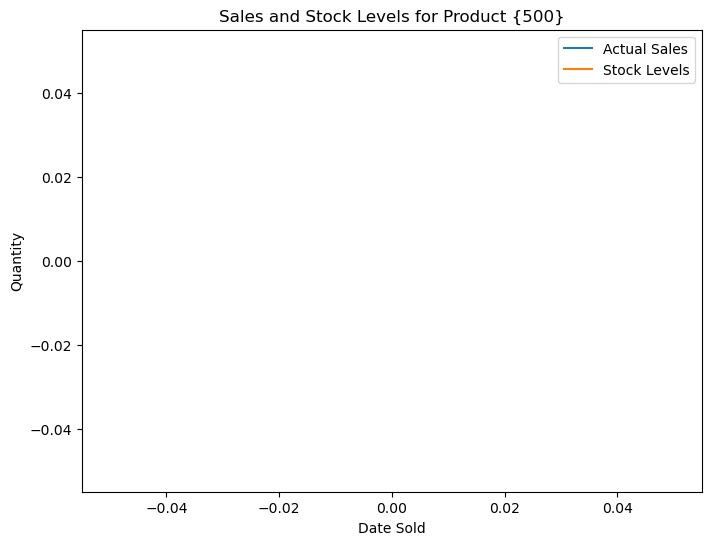

In [173]:
# Example: Plotting sales and stock levels over time
def plot_sales_and_stock(product_id, sales_df, stock_df):
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='Date Sold', y='quantity sold', data=sales_df[sales_df['Product ID'] == product_id], label='Actual Sales')
    sns.lineplot(x='Date Sold', y='Stock levels', data=stock_df[stock_df['Product ID'] == product_id], label='Stock Levels')
    plt.title(f"Sales and Stock Levels for Product {product_id}")
    plt.xlabel('Date Sold')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

# Usage
plot_sales_and_stock(product_id={product_id}, sales_df=df, stock_df=df)


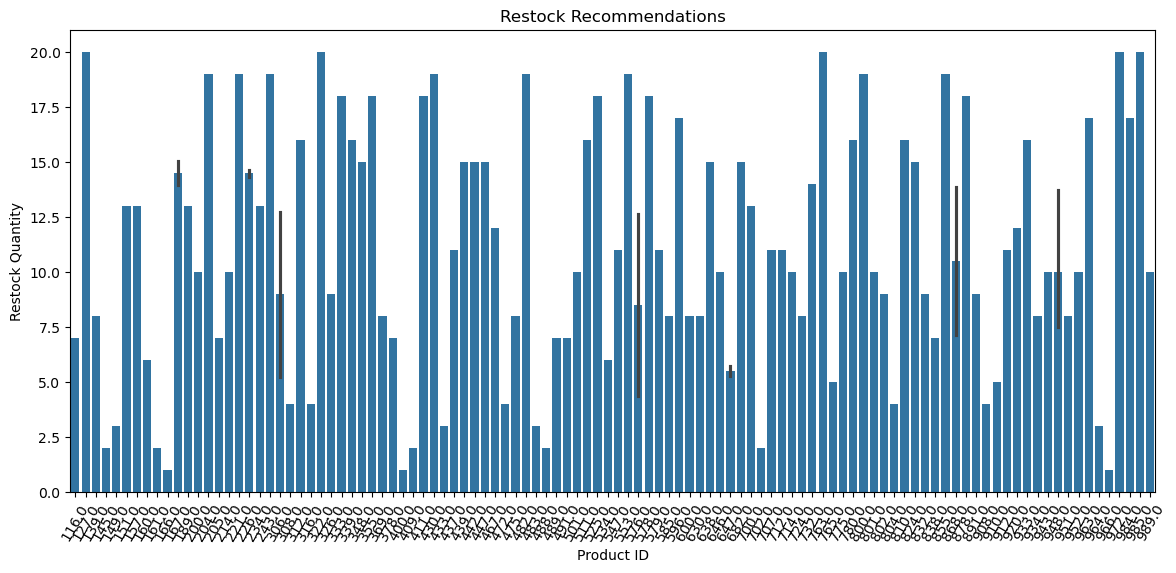

In [179]:
def plot_restock_recommendations(restock_recommendations):
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Product ID', y='Restock Quantity', data=restock_recommendations)
    plt.title('Restock Recommendations')
    plt.xlabel('Product ID')
    plt.ylabel('Restock Quantity')
    plt.xticks(rotation=60)
    plt.show()

# Plotting restock recommendations
plot_restock_recommendations(restock_recommendations)


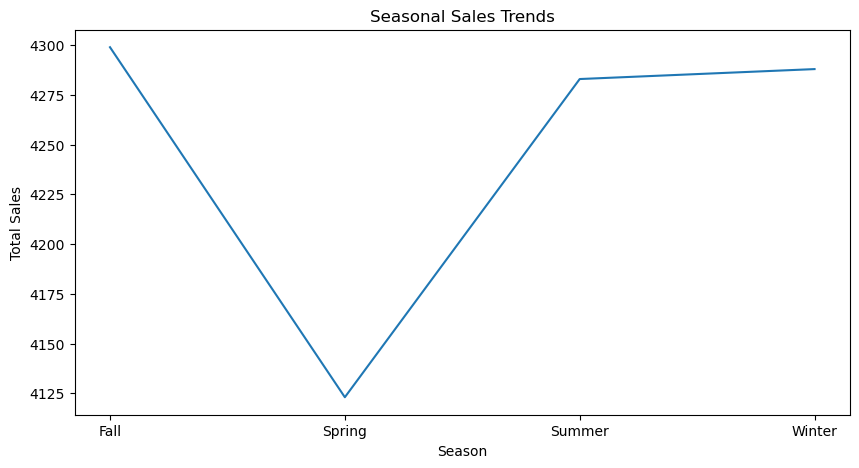

In [182]:
# Grouping by Season to see sales trends
seasonal_sales = df.groupby('Season')['quantity sold'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(x='Season', y='quantity sold', data=seasonal_sales)
plt.title('Seasonal Sales Trends')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()


ValueError: Could not interpret value `Date Sold` for `x`. An entry with this name does not appear in `data`.

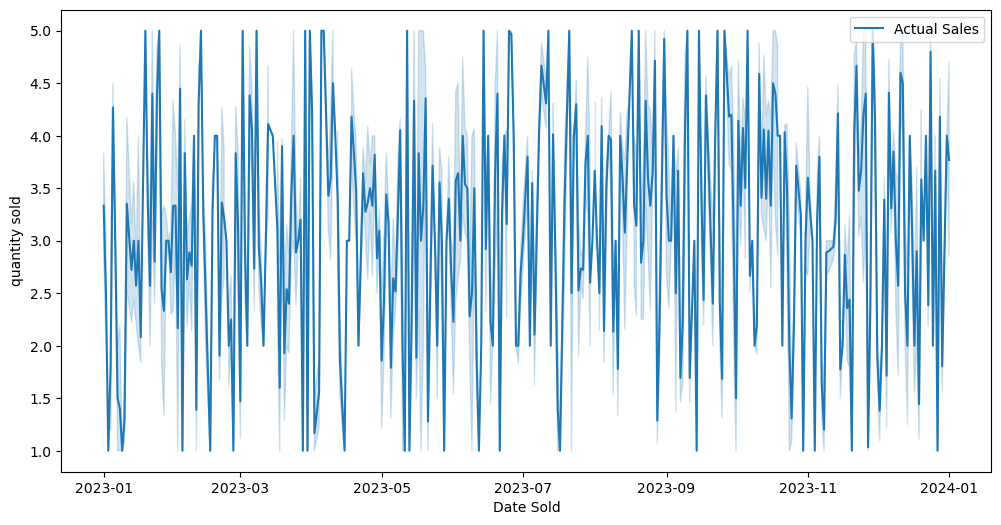

In [185]:
def plot_actual_vs_predicted(product_id, actual_sales, predicted_sales):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date Sold', y='quantity sold', data=actual_sales, label='Actual Sales')
    sns.lineplot(x='Date Sold', y='Predicted Sales', data=predicted_sales, label='Predicted Sales')
    plt.title(f'Actual vs Predicted Sales for Product {product_id}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

# You can plot for specific products
plot_actual_vs_predicted(product_id=500, actual_sales=df, predicted_sales=rf_predictions_df)


In [189]:
df[['Month','Season']]

,Month,Season
0,November,Fall
1,February,Winter
2,February,Winter
3,February,Winter
4,February,Winter
...,...,...
5439,December,Winter
5440,April,Spring
5441,April,Spring
5442,April,Spring
